# Step-response to a disturbance of the tank system with P-control
The system is given by 
$$ Y(s) = \frac{s + 6a}{s^2 + 7 s + 6(K+1)} D(s). $$

In [1]:
using Interact
using ControlSystems
using Gadfly

Interact.Options{:SelectionSlider,Any}(23: "input-9" = 15.0 Any , "K", 15.0, "15.0", 31, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.5"=>0.5,"1.0"=>1.0,"1.5"=>1.5,"2.0"=>2.0,"2.5"=>2.5,"3.0"=>3.0,"3.5"=>3.5,"4.0"=>4.0,"4.5"=>4.5…), Dict{Any,Any}(Pair{Any,Any}(2.0, "2.0"),Pair{Any,Any}(1.5, "1.5"),Pair{Any,Any}(11.0, "11.0"),Pair{Any,Any}(21.5, "21.5"),Pair{Any,Any}(25.0, "25.0"),Pair{Any,Any}(29.0, "29.0"),Pair{Any,Any}(3.5, "3.5"),Pair{Any,Any}(8.0, "8.0"),Pair{Any,Any}(23.5, "23.5"),Pair{Any,Any}(20.0, "20.0")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(25: "input-10" = 1.0 Any , "a", 1.0, "1.0", 51, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.02"=>0.02,"0.04"=>0.04,"0.06"=>0.06,"0.08"=>0.08,"0.1"=>0.1,"0.12"=>0.12,"0.14"=>0.14,"0.16"=>0.16,"0.18"=>0.18…), Dict{Any,Any}(Pair{Any,Any}(1.2, "1.2"),Pair{Any,Any}(0.54, "0.54"),Pair{Any,Any}(1.46, "1.46"),Pair{Any,Any}(2.0, "2.0"),Pair{Any,Any}(1.68, "1.68"),Pair{Any,Any}(0.86, "0.86"),Pair{Any,Any}(1.5, "1.5"),Pair{Any,Any}(1.06, "1.06"),Pair{Any,Any}(1.04, "1.04"),Pair{Any,Any}(1.4, "1.4")…)), Any[], Any[], true, "horizontal")

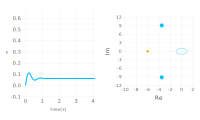

In [6]:
#set_default_plot_size(28cm, 20cm)
set_default_plot_size(20cm, 12cm)

N = 800; # Number of samples

t = collect(linspace(0, 20, N)); # 60 values per second 

# The input step
u = ones(N);

@manipulate for K in 0:0.5:30, a in 0.0:0.02:2
    G = minreal(tf([1.0, 6.0a], [1.0, 7, 6K + 6]));
    yr, t_out, x = lsim(G, u, t);
    stp = plot(x=t, y=yr, Geom.line, Guide.xlabel("time [s]"), Guide.ylabel("y"), 
    Coord.cartesian(xmin=-0.1, xmax=4, ymin=-0.1, ymax=0.7),
        style(line_width=3pt,  minor_label_font_size=14pt))
    
    if K<25/24
        pp = plot(
            layer(x = 1/2*sqrt(49-24*(K+1))*[1, -1] - [7/2, 7/2], y=[0,0], Geom.point, 
                style(point_size=6pt)), 
            layer(x = [-6.0a], y=[0], Geom.point, 
                style(point_size=4pt, default_color=colorant"orange")), 
            layer(x=cos.(linspace(0,2π,300)), y=sin.(linspace(0,2π,300)), Geom.path),
                Guide.xlabel("Re"), Guide.ylabel("Im"), 
            Coord.cartesian(xmin=-10, xmax=2, ymin=-12, ymax=12, aspect_ratio=1),
            style( major_label_font_size=16pt, minor_label_font_size=12pt))
    else
        pp = plot(
            layer(x = -7/2*[1, 1], y=1/2*sqrt(-49 + 24*(K+1))*[1, -1], Geom.point, 
                style(point_size=6pt)), 
            layer(x = [-6.0a], y=[0], Geom.point,
                style(point_size=4pt, default_color=colorant"orange")), 
            layer(x=cos.(linspace(0,2π,300)), y=sin.(linspace(0,2π,300)), Geom.path),
                Guide.xlabel("Re"), Guide.ylabel("Im"), 
            Coord.cartesian(xmin=-10, xmax=2, ymin=-12, ymax=12, aspect_ratio=1),
            style( major_label_font_size=16pt, minor_label_font_size=12pt))
    end
    fig1 = hstack(stp, pp)
end

In [7]:
plot(sin, 0, 2pi,
     Guide.annotation(
       compose(context(), circle([pi/2, 3*pi/2], [1.0, -1.0], [2mm]), fill(nothing),
       stroke("orange"))))

LoadError: [91mUndefVarError: compose not defined[39m